In [1]:
# Read the July 7th power data from the data folder.
import pandas as pd
df = pd.read_csv("../data/2012-11-power-survey-london.csv")

In [2]:
df.head()

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,M_count,N_count,O_count,P_count,Q_count,U_count,count,sigma,mean,std
0,2012-11-01 00:00:00,44.114,3.763,23.737,54.830,247.044000,93.629,26.592,69.337,5.030,...,96,123,85,87,703,38,4400,816.756000,0.185626,0.246391
1,2012-11-01 00:30:00,35.766,3.506,22.362,49.337,273.139000,80.841,24.748,58.632,5.067,...,96,123,86,87,705,38,4401,860.233001,0.195463,0.396347
2,2012-11-01 01:00:00,30.507,2.746,16.128,42.145,243.375000,70.748,21.182,53.795,3.900,...,96,123,86,87,705,38,4401,755.924000,0.171762,0.359319
3,2012-11-01 01:30:00,29.485,2.928,15.075,43.120,217.994999,64.444,19.340,45.153,3.955,...,96,123,86,87,705,38,4401,682.887999,0.155167,0.317513
4,2012-11-01 02:00:00,27.090,2.350,14.974,37.143,195.699000,60.609,17.298,42.826,3.608,...,96,123,86,87,705,38,4396,616.894000,0.140331,0.273899


In [3]:
from datetime import datetime
#type(df['datetime'][0])
#date_time_obj = datetime.strptime(df['datetime'][0], "%m/%d/%Y %H:%M")

# Create two functions that will allow us to create data based on the data in each row.

def dayCalc(row):
    return pd.to_datetime(row['datetime']).day

def tstampCalc(row):
    return f"{pd.to_datetime(row['datetime']).hour}:{pd.to_datetime(row['datetime']).minute:02}"
    
# Create new columns for the day of the month and also a column for the time stamp (e.g. 20:30).

df['day'] = df.apply(dayCalc, axis = 1)
df['tstamp'] = df.apply(tstampCalc, axis = 1)

# Could also do it with a lambda.
#df['day'] = pd.to_datetime(df['datetime'])
#df['day'] = df.apply(lambda row: pd.to_datetime(row['datetime']).day, axis = 1)

In [4]:
# Creating dataframe for England vs Australia match for November 17, 2017

df_EnglandVsAustralia = df.loc[df['day']==17]
df_EnglandVsAustralia = df_EnglandVsAustralia.set_index(df_EnglandVsAustralia["tstamp"])
df_EnglandVsAustralia.head(5)

,datetime,A_sigma,B_sigma,C_sigma,D_sigma,E_sigma,F_sigma,G_sigma,H_sigma,I_sigma,...,O_count,P_count,Q_count,U_count,count,sigma,mean,std,day,tstamp
tstamp,,,,,,,,,,,,,,,,,,,,,
0:00,2012-11-17 00:00:00,42.964,3.961,25.356,68.090,265.173000,99.647,28.534,83.741,6.108,...,86,87,704,38,4412,890.131000,0.201752,0.272982,17,0:00
0:30,2012-11-17 00:30:00,36.538,3.163,22.915,60.316,292.030001,88.735,26.897,70.306,5.579,...,86,87,705,38,4413,938.263000,0.212613,0.410633,17,0:30
1:00,2012-11-17 01:00:00,30.609,2.598,20.264,54.020,264.594000,83.699,26.021,62.344,4.776,...,86,87,705,38,4413,842.053001,0.190812,0.383475,17,1:00
1:30,2012-11-17 01:30:00,26.751,2.371,16.563,46.193,227.971001,74.083,21.120,52.792,4.639,...,86,87,705,38,4413,725.672000,0.164440,0.323526,17,1:30
2:00,2012-11-17 02:00:00,25.470,2.121,16.693,45.617,206.257999,69.327,20.310,48.575,4.344,...,86,87,705,38,4413,661.750000,0.149955,0.283709,17,2:00


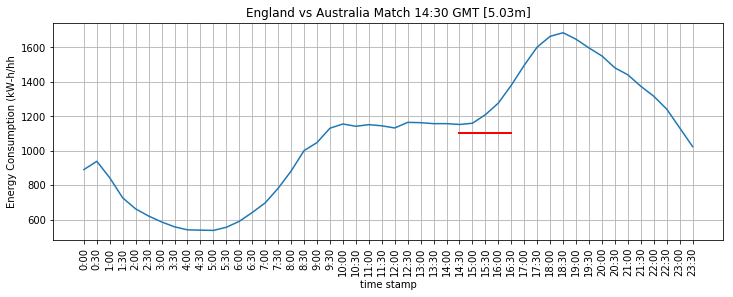

In [5]:
# Plot the day's energy consumption.

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,4))
plt.plot(df_EnglandVsAustralia["tstamp"],df_EnglandVsAustralia["sigma"])
plt.xticks(rotation='vertical')
plt.title("England vs Australia Match 14:30 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['14:30', '16:30'], [1100, 1100], color='r', linestyle='-', linewidth=2)
plt.show()

In [6]:
# Create date series for each Acorn group.

# Acorn1 = A, B, C
# Acorn2 = D, E
# Acorn3 = F, G, H, I, J
# Acorn4 = K, L, M, N
# Acorn5 = O, P, Q

Acorn1  = df_EnglandVsAustralia["A_sigma"] + df_EnglandVsAustralia["B_sigma"] + df_EnglandVsAustralia["C_sigma"]
Acorn2  = df_EnglandVsAustralia["D_sigma"] + df_EnglandVsAustralia["E_sigma"]
Acorn3  = df_EnglandVsAustralia["F_sigma"] + df_EnglandVsAustralia["G_sigma"] + df_EnglandVsAustralia["H_sigma"] \
                                           + df_EnglandVsAustralia["I_sigma"] + df_EnglandVsAustralia["J_sigma"]
Acorn4  = df_EnglandVsAustralia["K_sigma"] + df_EnglandVsAustralia["L_sigma"] + df_EnglandVsAustralia["M_sigma"] \
                                           + df_EnglandVsAustralia["N_sigma"]
Acorn5  = df_EnglandVsAustralia["O_sigma"] + df_EnglandVsAustralia["P_sigma"] + df_EnglandVsAustralia["Q_sigma"]

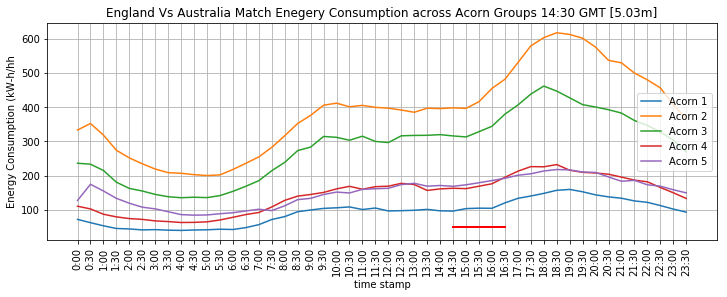

In [7]:
# Plot the day's energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_EnglandVsAustralia["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_EnglandVsAustralia["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_EnglandVsAustralia["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_EnglandVsAustralia["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_EnglandVsAustralia["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("England Vs Australia Match Enegery Consumption across Acorn Groups 14:30 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['14:30', '16:30'], [50, 50], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()

In [8]:
# Normalize the energy consumption for each Acorn group using the timestamp 19:30 as the reference value.
# This is to compare trends amongst the groups.

Acorn1 = Acorn1 / Acorn1['19:30']
Acorn2 = Acorn2 / Acorn2['19:30']
Acorn3 = Acorn3 / Acorn3['19:30']
Acorn4 = Acorn4 / Acorn4['19:30']
Acorn5 = Acorn5 / Acorn5['19:30']

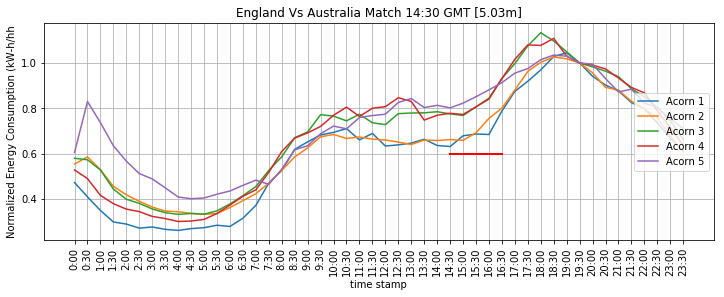

In [10]:
# Plot the day's normalized energy consumption for each Acorn group using a multiline plot.

plt.figure(figsize=(12,4))
hnd1, = plt.plot(df_EnglandVsAustralia["tstamp"],Acorn1, label = 'Acorn 1')
hnd2, = plt.plot(df_EnglandVsAustralia["tstamp"],Acorn2, label = 'Acorn 2')
hnd3, = plt.plot(df_EnglandVsAustralia["tstamp"],Acorn3, label = 'Acorn 3')
hnd4, = plt.plot(df_EnglandVsAustralia["tstamp"],Acorn4, label = 'Acorn 4')
hnd5, = plt.plot(df_EnglandVsAustralia["tstamp"],Acorn5, label = 'Acorn 5')
plt.xticks(rotation='vertical')
plt.title("England Vs Australia Match 14:30 GMT [5.03m]")
plt.xlabel("time stamp")
plt.ylabel("Normalized Energy Consumption (kW-h/hh")
plt.grid()
plt.plot(['14:30', '16:30'], [0.6, 0.6], color='r', linestyle='-', linewidth=2)
plt.legend(handles=[hnd1, hnd2, hnd3, hnd4, hnd5], loc="right")
plt.show()